# Tutorial - Markov Chain

By Filipe Chagas

## Introduction

This tutorial shows how to do Monte Carlo simulation with a simple Markov Chain using PyMCSL.

The following Markov chain will be simulated:

![saw-markov-chain](imgs/saw-markov-chain.drawio.png)

This Markov Chain can be used to generate saw wave signals with random periods ranging from 1 to 4. The numerical states $\{0,1,2,3,4\}$ of this Markov Chain represent the magnitude of the signal.

## Simulation

First, we need to import packages we will use, that is PyMCSL, NumPy and PyPlot.

In [1]:
import pymcsl as mcs
import numpy as np
import matplotlib.pyplot as plt

Now let's create an instance of MonteCarloSimulationEnv. This simulation environment will have a variable 's' of type **int**, which is the magnitude of the signal.

We want to generate 1000 signals that are 100 samples long, so let's set the number of subsimulations to 1000 and the number of steps to 100.

In [2]:
N_SUBSIMULATIONS = 1000
N_STEPS = 100

env = mcs.MonteCarloSimulationEnv(
    variables=[
        ('s', int, 0),
    ],
    n_subsimulations = N_SUBSIMULATIONS,
    n_steps = N_STEPS
)

In the body of the **beginf** function, we will instantiate a **SimpleMarkovChain** object and store its reference in the context as an auxiliary attribute called 'chain'. In the **SimpleMarkovChain** constructor, we pass a set of states, a list of transitions in the format $[(\text{source state}, \text{target state}, \text{transition weight})]$, and an initial state. Transition weights are values proportional to the transition probabilities.

In [3]:
@env.subsim_begin
def beginf(context):
    context.chain = mcs.SimpleMarkovChain(
        states={0,1,2,3,4},
        transitions=[ #(source, dest, weight)
            (0, 1, 1),
            (1, 2, 0.5),
            (2, 3, 0.5),
            (3, 4, 0.5),
            (1, 0, 0.5),
            (2, 0, 0.5),
            (3, 0, 0.5),
            (4, 0, 1),
        ],
        initial_state=1
    )

In the **stepf** function, we make a random transition in the Markov chain using the **forward** method, and then we get the chain state using the **state** property and store it in the 's' variable.

In [4]:
@env.subsim_step
def stepf(context, step):
    context.chain.foward()
    context.s = context.chain.state

Run the simularion:

In [5]:
env.run()

100%|██████████| 1000/1000 [00:03<00:00, 267.75it/s]


We use the **get_variable_histories** method to get all 1000 generated signals and plot the first one.

No handles with labels found to put in legend.


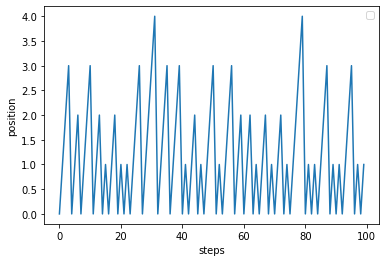

In [6]:
sh = env.get_variable_histories('s') #sh[subsim index, step index]

plt.plot(sh[0, :])

plt.xlabel('steps')
plt.ylabel('position')
plt.legend()
plt.show()

We use the **get_variable_histogram** method to get the occurrence rates for each wave period.

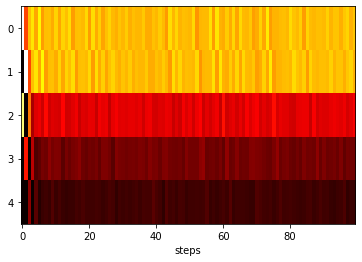

In [7]:
N_BINS = 5
shistogram = env.get_variable_histogram('s', n_bins=N_BINS, density=True, _range=(0,5)) #xhistogram[step_index, bin_index]
plt.imshow(np.transpose(shistogram), cmap='hot', aspect='auto')
plt.xlabel('steps')
plt.yticks([0,1,2,3,4], [0,1,2,3,4])
plt.show()

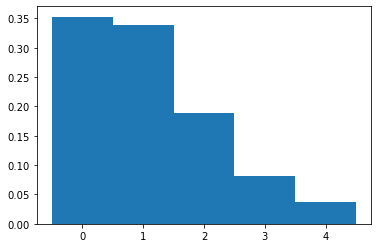

In [8]:
bar_width = 10
plt.bar([i*bar_width for i in range(N_BINS)], shistogram[N_STEPS-1, :], bar_width)
plt.xticks([i*bar_width for i in range(5)], [i for i in range(5)])
plt.show()